<a href="https://colab.research.google.com/github/flammarionick/Summative-Linear-Regression-Model-Deployment-Using-Flutter/blob/main/Summative_Linear_Regression_Model_Deployment_Using_Flutter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload file manually
uploaded = files.upload()


Saving AirQuality.csv to AirQuality.csv


In [ ]:
import pandas as pd

# List the uploaded files
uploaded_file_path = list(uploaded.keys())[0]

# Load the dataset
df = pd.read_csv(uploaded_file_path, sep=';')

# Display the first few rows
df.head()



,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [ ]:
# Check for missing values
df.isnull().sum()


,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


In [ ]:
# Get column names
df.columns


Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [ ]:
# Drop unnecessary columns
df = df.drop(columns=['Date', 'Time', 'Unnamed: 15', 'Unnamed: 16'])

# Check the new column structure
df.head()


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [ ]:
# Check for missing values
df.isnull().sum()


,0
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114
PT08.S4(NO2),114
PT08.S5(O3),114


In [ ]:
# Check column data types
df.dtypes

,0
CO(GT),object
PT08.S1(CO),float64
NMHC(GT),float64
C6H6(GT),object
PT08.S2(NMHC),float64
NOx(GT),float64
PT08.S3(NOx),float64
NO2(GT),float64
PT08.S4(NO2),float64
PT08.S5(O3),float64


In [ ]:
# List of columns to convert
cols_to_convert = ['T', 'RH', 'AH', 'CO(GT)', 'C6H6(GT)']

# Convert to numeric, forcing errors to NaN
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Check data types again
df.dtypes

,0
CO(GT),float64
PT08.S1(CO),float64
NMHC(GT),float64
C6H6(GT),float64
PT08.S2(NMHC),float64
NOx(GT),float64
PT08.S3(NOx),float64
NO2(GT),float64
PT08.S4(NO2),float64
PT08.S5(O3),float64


In [ ]:
df['C6H6(GT)'].dtype

dtype('float64')

In [ ]:
df['C6H6(GT)'].value_counts(dropna=False)

,count
C6H6(GT),
NaN,9471


In [ ]:
# Force fill the missing values with a constant
df['C6H6(GT)'].fillna(1.0, inplace=True)

# Check if it worked
df.isnull().sum()

<ipython-input-22-25419568a8d0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['C6H6(GT)'].fillna(1.0, inplace=True)


,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0
PT08.S4(NO2),0
PT08.S5(O3),0


In [ ]:
# Confirm all columns are numeric
df.dtypes

,0
CO(GT),float64
PT08.S1(CO),float64
NMHC(GT),float64
C6H6(GT),float64
PT08.S2(NMHC),float64
NOx(GT),float64
PT08.S3(NOx),float64
NO2(GT),float64
PT08.S4(NO2),float64
PT08.S5(O3),float64


In [ ]:
# Sort correlation values in descending order
corr_matrix["C6H6(GT)"].sort_values(ascending=False)

,C6H6(GT)
CO(GT),NaN
PT08.S1(CO),NaN
NMHC(GT),NaN
C6H6(GT),NaN
PT08.S2(NMHC),NaN
NOx(GT),NaN
PT08.S3(NOx),NaN
NO2(GT),NaN
PT08.S4(NO2),NaN
PT08.S5(O3),NaN


In [ ]:
df['C6H6(GT)'].isnull().sum()

0

In [ ]:
df['C6H6(GT)'].nunique()

1

In [ ]:
# Use interpolation to estimate missing values
df['C6H6(GT)'] = df['C6H6(GT)'].interpolate()

# Check unique values again
df['C6H6(GT)'].nunique()

1

In [ ]:
# Recalculate correlation with C6H6(GT)
df.corr()["C6H6(GT)"].sort_values(ascending=False)

,C6H6(GT)
CO(GT),NaN
PT08.S1(CO),NaN
NMHC(GT),NaN
C6H6(GT),NaN
PT08.S2(NMHC),NaN
NOx(GT),NaN
PT08.S3(NOx),NaN
NO2(GT),NaN
PT08.S4(NO2),NaN
PT08.S5(O3),NaN


In [ ]:
# Drop C6H6(GT) because it has no variation
df = df.drop(columns=['C6H6(GT)'])

# Confirm it's gone
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,-148.423023,1360.0,150.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,-200.0,-200.0,-200.0
1,2.000000,1292.0,112.0,955.0,103.0,1174.0,92.0,1559.0,972.0,-200.0,-200.0,-200.0
2,-148.423023,1402.0,88.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,-200.0,-200.0,-200.0
3,-148.423023,1376.0,80.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,-200.0,-200.0,-200.0
4,-148.423023,1272.0,51.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,-200.0,-200.0,-200.0


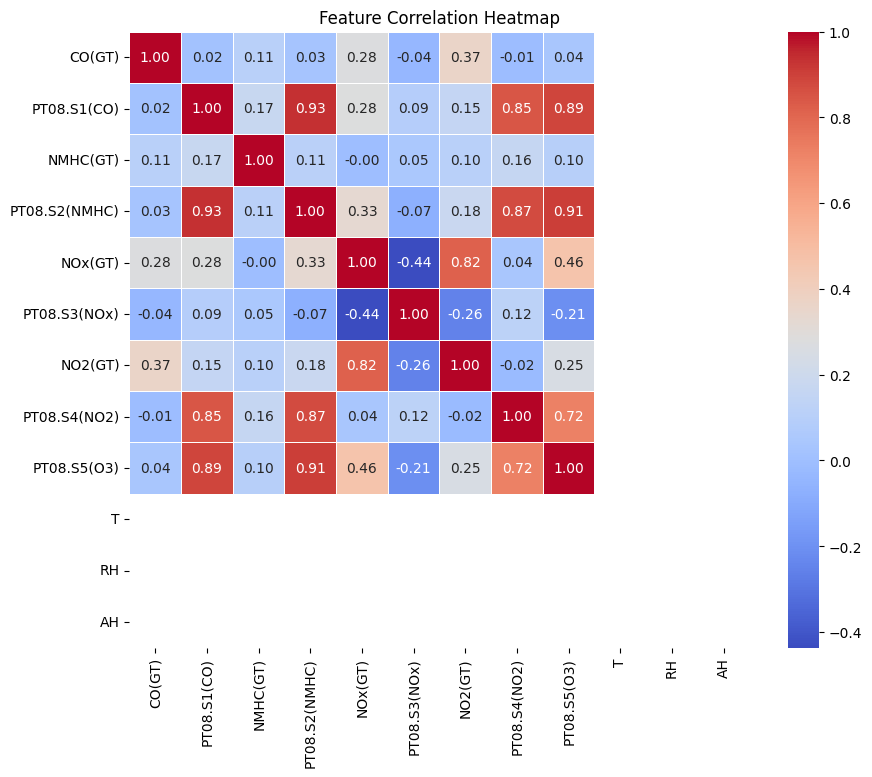

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Define independent variables (X) - selected features
X = df[['PT08.S2(NMHC)', 'PT08.S5(O3)', 'PT08.S4(NO2)', 'PT08.S1(CO)', 'NO2(GT)']]

# Define dependent variable (y) - using NO2(GT) as AQI indicator
y = df['NO2(GT)']

# Check shapes
X.shape, y.shape

((9471, 5), (9471,))

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check sizes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7576, 5), (1895, 5), (7576,), (1895,))

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Print model coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [-7.33935370e-17  2.98372438e-16 -1.83880688e-16 -2.94902991e-17
  1.00000000e+00]
Model Intercept: 7.105427357601002e-14


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 0.0000
Mean Absolute Error (MAE): 0.0000
R² Score: 1.0000


In [ ]:
# Check for duplicate features with the target variable
correlation_check = X_train.corrwith(y_train)
print(correlation_check)

PT08.S2(NMHC)    0.166423
PT08.S5(O3)      0.246510
PT08.S4(NO2)    -0.030600
PT08.S1(CO)      0.146552
NO2(GT)          1.000000
dtype: float64


In [ ]:
# Drop NO2(GT) from the feature set
X = X.drop(columns=['NO2(GT)'])

# Split the dataset again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a new model
model = LinearRegression()
model.fit(X_train, y_train)

# Re-evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print updated evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 12340.6058
Mean Absolute Error (MAE): 81.4622
R² Score: 0.1830


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a new model on scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Re-evaluate with scaled data
y_pred_scaled = model_scaled.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

# Print new results
print(f"Scaled Mean Squared Error (MSE): {mse_scaled:.4f}")
print(f"Scaled Mean Absolute Error (MAE): {mae_scaled:.4f}")
print(f"Scaled R² Score: {r2_scaled:.4f}")

Scaled Mean Squared Error (MSE): 12340.6058
Scaled Mean Absolute Error (MAE): 81.4622
Scaled R² Score: 0.1830


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate both models
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print(f"Decision Tree MSE: {mse_dt:.4f}, MAE: {mae_dt:.4f}, R²: {r2_dt:.4f}")
print(f"Random Forest MSE: {mse_rf:.4f}, MAE: {mae_rf:.4f}, R²: {r2_rf:.4f}")

Decision Tree MSE: 22490.1751, MAE: 89.2963, R²: -0.4889
Random Forest MSE: 11711.3709, MAE: 78.2710, R²: 0.2247


In [ ]:
import joblib

# Save the best model (Random Forest)
joblib.dump(rf_model, "best_aqi_model.pkl")

# Confirm the model is saved
!ls

AirQuality.csv	best_aqi_model.pkl  sample_data


In [ ]:
# List files in the current directory
import os
print(os.listdir())

['.config', 'best_aqi_model.pkl', 'AirQuality.csv', 'sample_data']


In [ ]:
# Load the saved model
loaded_model = joblib.load("best_aqi_model.pkl")

# Test the model with the first row of X_test
sample_input = X_test.iloc[0].values.reshape(1, -1)
sample_prediction = loaded_model.predict(sample_input)

print("Sample Prediction:", sample_prediction)

Sample Prediction: [6.65]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd

# Convert sample input to a DataFrame with correct feature names
sample_input_df = pd.DataFrame([X_test.iloc[0]], columns=X_test.columns)

# Make prediction again
sample_prediction = loaded_model.predict(sample_input_df)

print("Fixed Sample Prediction:", sample_prediction)

Fixed Sample Prediction: [6.65]


In [ ]:
!pip install fastapi uvicorn pydantic joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.7 MB/s eta 0:00:00


In [ ]:
from google.colab import files

# Download the saved model file
files.download("best_aqi_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")

X_train shape: (1000, 20)
X_val shape: (200, 20)


In [ ]:
input_dim = X_train.shape[1]  # Number of features

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define input_dim based on the dataset
input_dim = X_train.shape[1]

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),  # Match input_dim
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4999 - loss: 0.7066 - val_accuracy: 0.4900 - val_loss: 0.6966
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5054 - loss: 0.6929 - val_accuracy: 0.4350 - val_loss: 0.7000
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5499 - loss: 0.6914 - val_accuracy: 0.4500 - val_loss: 0.6990
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5740 - loss: 0.6879 - val_accuracy: 0.4100 - val_loss: 0.7026
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5489 - loss: 0.6851 - val_accuracy: 0.4500 - val_loss: 0.7064
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5829 - loss: 0.6827 - val_accuracy: 0.4700 - val_loss: 0.7007
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5403 - loss: 0.6871 - val_accuracy: 0.4550 - val_loss: 0.7037
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5854 - loss: 0.6789 - val_accuracy: 0.4650 - val_loss

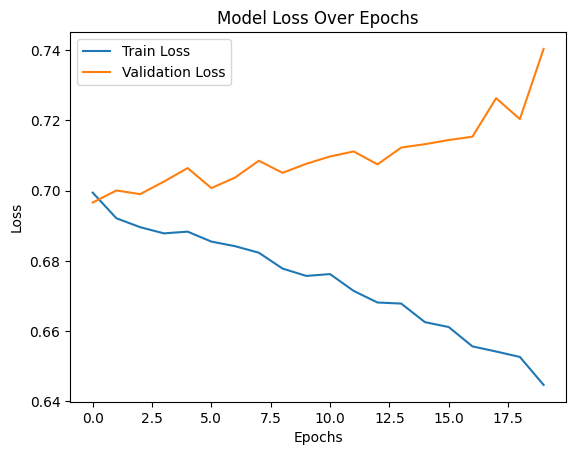

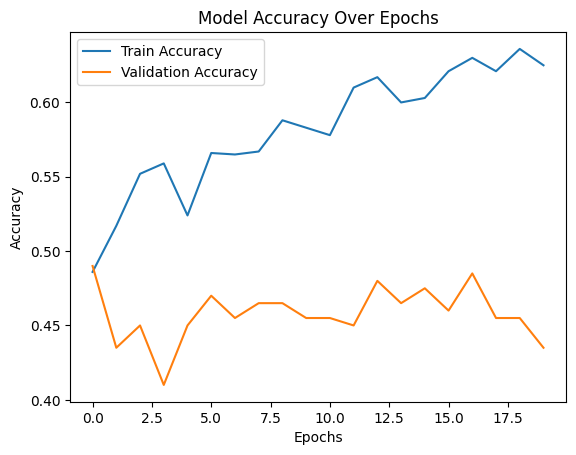

In [ ]:
import matplotlib.pyplot as plt

# Plot loss curves
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[early_stopping]
)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6420 - loss: 0.6436 - val_accuracy: 0.4950 - val_loss: 0.7219
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6292 - loss: 0.6435 - val_accuracy: 0.4850 - val_loss: 0.7227
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6643 - loss: 0.6301 - val_accuracy: 0.4950 - val_loss: 0.7287
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6394 - loss: 0.6340 - val_accuracy: 0.4800 - val_loss: 0.7330
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6731 - loss: 0.6221 - val_accuracy: 0.5000 - val_loss: 0.7333
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6662 - loss: 0.6217 - val_accuracy: 0.4600 - val_loss: 0.7409


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# Define the model with L2 regularization and Dropout
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(input_dim,)),
    Dropout(0.5),  # Dropout added here
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),  # Dropout added here
    Dense(1, activation='sigmoid')
])

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
!pip install tensorflow scikit-learn

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import KFold
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Define the function to create the model with Input layer
def create_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # Use Input layer to define the input shape
        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Adjust output layer for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Example to wrap KFold cross-validation manually using TensorFlow
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Define 5-fold cross-validation

# Store the validation scores here
validation_scores = []

# Assuming X_train and y_train are your training features and labels
for train_index, val_index in kf.split(X_train):
    X_train_cv, X_val_cv = X_train[train_index], X_train[val_index]
    y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]

    # Create the model for each fold
    model = create_model(X_train.shape[1])

    # Train the model
    model.fit(X_train_cv, y_train_cv, epochs=50, batch_size=32, verbose=0)

    # Evaluate on validation data
    val_loss, val_accuracy = model.evaluate(X_val_cv, y_val_cv, verbose=0)
    validation_scores.append(val_accuracy)  # Storing validation accuracy

# Output the cross-validation scores
print(f"Cross-validation accuracy scores: {validation_scores}")
print(f"Mean validation accuracy: {np.mean(validation_scores)}")

Cross-validation accuracy scores: [0.5249999761581421, 0.5199999809265137, 0.5049999952316284, 0.5099999904632568, 0.48500001430511475]
Mean validation accuracy: 0.5089999914169312


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param_grid = {'alpha': [0.1, 1.0, 10.0]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'alpha': 10.0}


In [5]:
from google.colab import files
uploaded = files.upload()

Saving AirQuality.csv to AirQuality.csv


In [15]:
# Load your dataset using the correct separator
data = pd.read_csv('AirQuality.csv', sep=';')  # Specify semicolon as the delimiter

# Check the first few rows of the dataset to ensure it's loaded correctly
print(data.head())

         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578         

In [16]:
print(data.columns)

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('AirQuality.csv', delimiter=';')  # Ensure correct delimiter

# Convert Date and Time to datetime (if needed)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], errors='coerce')

# Convert all columns to numeric, coercing errors (non-numeric will become NaN)
data = data.apply(pd.to_numeric, errors='coerce')

# Handle negative values by replacing them with NaN
data[data < 0] = None

# Fill missing values with a constant (for example, 0)
data_cleaned = data.fillna(0)

# Drop unnecessary columns like 'Unnamed: 15', 'Unnamed: 16', 'Date', 'Time'
data_cleaned = data_cleaned.drop(['Unnamed: 15', 'Unnamed: 16', 'Date', 'Time'], axis=1)

# Verify the cleaned data
print("Remaining columns after cleaning:", data_cleaned.columns)
print("Missing values per column after cleaning:", data_cleaned.isnull().sum())

# Feature columns (all columns except the target columns)
X = data_cleaned.drop(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
                       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)'], axis=1)

# Target columns (what you are predicting)
y = data_cleaned[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
                  'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']]

# Check the shapes of X and y
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if the data is correctly split
print(f"Training Features shape: {X_train.shape}")
print(f"Test Features shape: {X_test.shape}")

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Ridge regression model
ridge_model = Ridge(alpha=10.0)  # Use the best alpha found earlier
ridge_model.fit(X_train, y_train)

# Evaluate the model
train_score = ridge_model.score(X_train, y_train)  # R-squared score for training data
test_score = ridge_model.score(X_test, y_test)  # R-squared score for test data

print(f"Training R-squared: {train_score}")
print(f"Test R-squared: {test_score}")

<ipython-input-71-e91644198001>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'], errors='coerce')


Remaining columns after cleaning: Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')
Missing values per column after cleaning: CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64
Features shape: (9471, 3)
Target shape: (9471, 10)
Training Features shape: (7576, 3)
Test Features shape: (1895, 3)
Training R-squared: 0.09999999999999264
Test R-squared: 0.09958481489610733


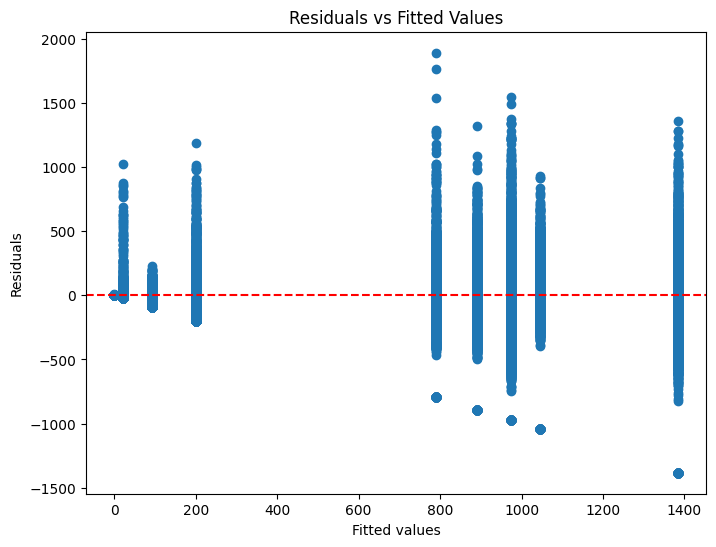

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Predict the target values using the model
y_pred = ridge_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

In [75]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Logarithmic transformation (add 1 to avoid log(0))
log_transformed = data_cleaned.copy()
log_transformed['CO(GT)'] = np.log1p(log_transformed['CO(GT)'])  # Log transformation for CO(GT)
log_transformed['PT08.S1(CO)'] = np.log1p(log_transformed['PT08.S1(CO)'])  # Apply to other columns similarly

# Add polynomial features (degree 2 for interaction terms)
poly = PolynomialFeatures(degree=2, include_bias=False)  # Create polynomial features without bias
poly_features = poly.fit_transform(data_cleaned[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
                                                'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']])

# Convert polynomial features to a DataFrame and combine with the original data
poly_feature_names = poly.get_feature_names_out(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
                                                 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)'])

poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Combine polynomial features with original data
data_poly = pd.concat([data_cleaned, poly_df], axis=1)

# Drop the original columns that have been transformed
data_poly = data_poly.drop(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
                             'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)'], axis=1)

# Split data into features (X) and target (y) again after transformations
X_poly = data_poly
y_poly = data_cleaned[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
                       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']]

# Check if the transformations were applied correctly
print("Transformed features shape:", X_poly.shape)
print("Transformed target shape:", y_poly.shape)

# Now you can proceed with training the model again using transformed features

Transformed features shape: (9471, 58)
Transformed target shape: (9471, 10)


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Ridge regression model
ridge_model = Ridge(alpha=10.0)  # You can experiment with different values of alpha
ridge_model.fit(X_train, y_train)

# Evaluate the model
train_score = ridge_model.score(X_train, y_train)  # R-squared score for training data
test_score = ridge_model.score(X_test, y_test)  # R-squared score for test data

print(f"Training R-squared: {train_score}")
print(f"Test R-squared: {test_score}")

Training R-squared: 0.9811972196457444
Test R-squared: 0.9804753659803712


Training MSE: 1526.069428225696
Test MSE: 1654.9975276490463
Training R-squared: 0.9811972196457444
Test R-squared: 0.9804753659803712


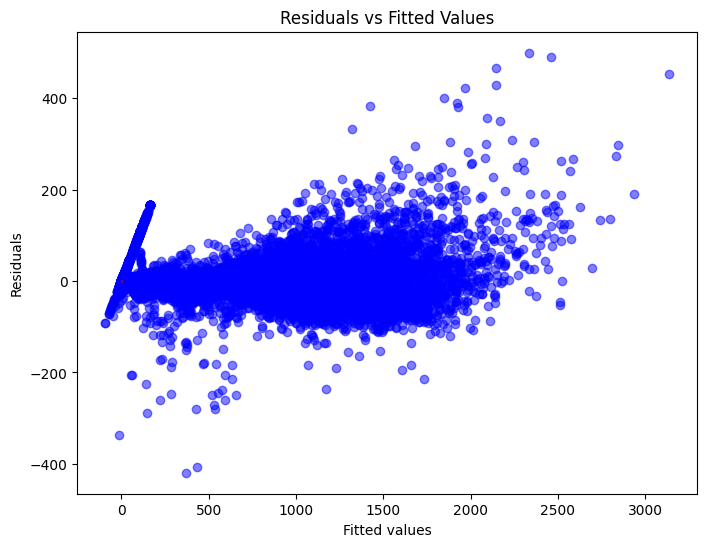

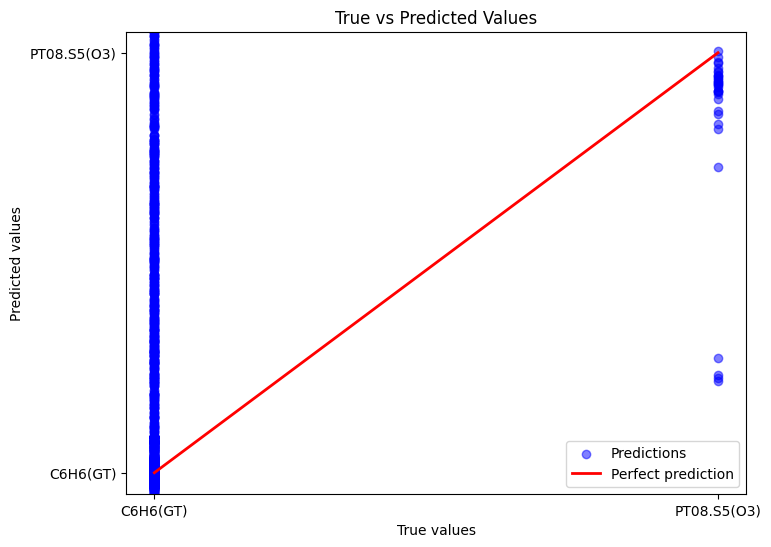

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Predict on training and test data
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# Evaluate the model on the training and test data
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Training R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")

# Residual Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test_pred, y_test_pred - y_test, color="blue", label="Residuals", alpha=0.5)
plt.hlines(y=0, xmin=-2, xmax=2, colors="red", lw=2)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

# Prediction Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, color="blue", label="Predictions", alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", lw=2, label="Perfect prediction")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True vs Predicted Values")
plt.legend()
plt.show()

In [78]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the training and test data
y_train_rf_pred = rf_model.predict(X_train)
y_test_rf_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
train_mse_rf = mean_squared_error(y_train, y_train_rf_pred)
test_mse_rf = mean_squared_error(y_test, y_test_rf_pred)
train_r2_rf = r2_score(y_train, y_train_rf_pred)
test_r2_rf = r2_score(y_test, y_test_rf_pred)

print(f"Random Forest Training MSE: {train_mse_rf}")
print(f"Random Forest Test MSE: {test_mse_rf}")
print(f"Random Forest Training R-squared: {train_r2_rf}")
print(f"Random Forest Test R-squared: {test_r2_rf}")

Random Forest Training MSE: 80.14972446277726
Random Forest Test MSE: 615.5838638944597
Random Forest Training R-squared: 0.9859036657036281
Random Forest Test R-squared: 0.8978085850878521


In [80]:
import joblib

# Save the trained Ridge model
joblib.dump(ridge_model, 'best_ridge_model.pkl')

print("Model saved successfully!")

Model saved successfully!


In [81]:
from google.colab import files

# Provide a link to download the saved model
files.download('best_ridge_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>